In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from collections import defaultdict
import pickle
import math
from os import path
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime


In [2]:
data_prefix = '/home/rc7ne/Project/SessionRecommendation/Data/tmall/100000/'
itemKey = 'train_item.pickle'
timeKey = 'train_time.pickle'

time_filename = data_prefix + timeKey
time_seq_arr_total = pickle.load(open(time_filename, "rb"))

item_filename = data_prefix + itemKey
data_file = open(item_filename, "rb")
m_seq_list = pickle.load(data_file) 

In [4]:
cnt = 0
for t in time_seq_arr_total:
    for ti in t:
        if ti < 1511136000 or ti > 1512432000:
            print(ti, t)
            cnt += 1
            break
    if cnt > 5: break

1510804871 [1510804871, 1511588363, 1511588379, 1511608100, 1511614924, 1511615140, 1511615204, 1511615794, 1511616221, 1511668785, 1511668803, 1511679672, 1511679739, 1511680222, 1511692407, 1511698656, 1511699566, 1511759670, 1511869176, 1511871836, 1511871842, 1511872869, 1511872946, 1511872949, 1511872964, 1511872974, 1511873103, 1511874287, 1512133743, 1512223499, 1512223582, 1512223763, 1512283981, 1512283992, 1512284130, 1512284142, 1512284280, 1512284848, 1512284947, 1512284959, 1512285268, 1512285830, 1512285856, 1512286055, 1512286239, 1512286301, 1512286401, 1512286411, 1512286760]
1510391863 [1510391863, 1511749724, 1511749738, 1511771610, 1511771745, 1512092768, 1512092872, 1512092877, 1512092893, 1512092963, 1512092990, 1512093254, 1512093365, 1512093695, 1512093840, 1512110626, 1512111893, 1512131622, 1512180259, 1512180418, 1512180490, 1512181807, 1512181923, 1512223085]
1510624240 [1510624240, 1511877755, 1511877761, 1511877865, 1511878228, 1511878712, 1512303650, 1512

In [4]:
# SRC = '/home/jw7jb/seqrec/hawkes/dataset/'
SRC = '../'
dataset_name = 'taobao'
TRAIN_FILE = SRC + dataset_name + '_train.pickle'
TEST_FILE = SRC + dataset_name + '_test.pickle'
MISC_FILE = SRC + dataset_name + '_misc.pickle'

In [3]:
# data_home = '/home/jw7jb/data/taobao/'
data_home = './'
data_src = 'UserBehavior.csv'
df = pd.read_csv(data_home+data_src) 

In [4]:
df.sort_values(by=['userid', 'timestamp'], ascending=True, inplace=True)

In [121]:
df.shape, df.head()

((7879602, 5),    userid   itemid  categoryid behavior   timestamp
 0       1  2268318     2520377       pv  1511544070
 1       1  2333346     2520771       pv  1511561733
 2       1  2576651      149192       pv  1511572885
 3       1  3830808     4181361       pv  1511593493
 4       1  4365585     2520377       pv  1511596146)

### drop low freq catagory

In [6]:
cate_freq = df['categoryid'].value_counts()

(array([0.06137631, 0.07967911, 0.09860118, 0.12089482, 0.12337189,
        0.09887641, 0.04775242, 0.01438077, 0.00357799, 0.00096331]),
 array([ 0.        ,  1.53970696,  3.07941393,  4.61912089,  6.15882786,
         7.69853482,  9.23824179, 10.77794875, 12.31765571, 13.85736268,
        15.39706964]),
 <a list of 10 Patch objects>)

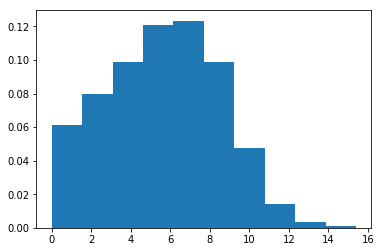

In [9]:
hist = [math.log(v) for k, v in cate_freq.items()]
plt.hist(hist, density=True)

In [10]:
remove_list = set()
for k, v in cate_freq.items():
    if v < 10:
        remove_list.add(k)
len(remove_list) / len(cate_freq.keys() )

0.1455662676130946

In [11]:
df.drop(df[ df.itemid.isin(remove_list) ].index, inplace=True)

In [19]:
df.shape[0], df.userid.nunique(), df.itemid.nunique(), df.categoryid.nunique()

(85542068, 987716, 732382, 5997)

### drop low freq item

In [13]:
item_freq = df['itemid'].value_counts()

(array([4.08524590e-01, 2.38275187e-01, 1.62830821e-01, 8.71030287e-02,
        4.27339445e-02, 1.66553983e-02, 4.94610656e-03, 9.80898814e-04,
        1.21369757e-04, 7.39777564e-06]),
 array([ 0.        ,  1.03930793,  2.07861587,  3.1179238 ,  4.15723173,
         5.19653966,  6.2358476 ,  7.27515553,  8.31446346,  9.35377139,
        10.39307933]),
 <a list of 10 Patch objects>)

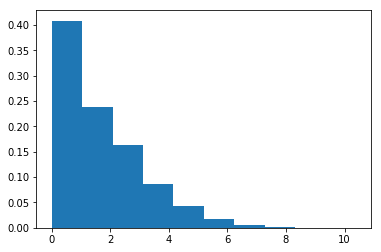

In [15]:
hist = [math.log(v) for k, v in item_freq.items()]
plt.hist(hist, density=True)

In [14]:
remove_list = set()
for k, v in item_freq.items():
    if v < 20:
        remove_list.add(k)
len(remove_list) / len(item_freq.keys() )

0.8240322496938989

In [16]:
df.drop(df[ df.itemid.isin(remove_list) ].index, inplace=True)

In [20]:
df.shape[0], df.userid.nunique(), df.itemid.nunique(), df.categoryid.nunique()

(85542068, 987716, 732382, 5997)

### drop low freq user

In [21]:
user_freq = df.userid.value_counts()

(array([0.00090151, 0.00504847, 0.02811656, 0.08611936, 0.20536436,
        0.34465169, 0.4050257 , 0.30532457, 0.10880261, 0.00717876]),
 array([0.        , 0.66821086, 1.33642172, 2.00463258, 2.67284344,
        3.3410543 , 4.00926516, 4.67747602, 5.34568688, 6.01389774,
        6.6821086 ]),
 <a list of 10 Patch objects>)

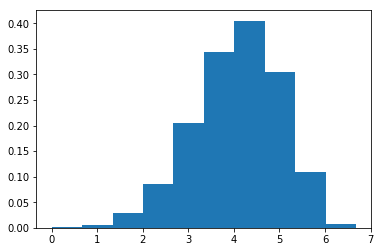

In [22]:
hist = [math.log(v) for k, v in user_freq.items()]
plt.hist(hist, density=True)

In [24]:
bad_users = user_freq[user_freq > 200].index
df.drop(df[ df.userid.isin(bad_users) ].index, inplace=True)

bad_users = user_freq[user_freq < 20].index
df.drop(df[ df.userid.isin(bad_users) ].index, inplace=True)

In [25]:
df.shape[0], df.userid.nunique(), df.itemid.nunique(), df.categoryid.nunique()

(60396873, 774726, 732212, 5997)

In [26]:
pickle.dump( df, open('taobao_small.pickle', 'wb'))

In [56]:
df = pickle.load( open('taobao_small.pickle', 'rb'))

In [57]:
df.drop(df[ df.userid >= df.userid.unique()[100000] ].index, inplace=True)

In [58]:
df.shape[0], df.userid.nunique(), df.itemid.nunique(), df.categoryid.nunique()

(7879602, 100000, 677940, 5870)

In [66]:
# print( [ (p, q) for p,q in zip( df.userid.values[:100], df.behavior.values[:100] ) ] )
a_map = {}
ids = 0
for p in df.behavior.values[:100]:
    if p not in a_map:
        a_map[p] = ids
        ids += 1
print(a_map)

{'pv': 0, 'fav': 1, 'buy': 2, 'cart': 3}


In [28]:
max_user = 100000
t_list = []
y_list = []
c_list = []
a_list = []
u_list = []

for user in df.userid.unique():
    user_seq = df.loc[df.userid==user]
#     user_t = user_seq['timestamp'].values
#     user_y = user_seq['itemid'].values
#     user_c = user_seq['categoryid'].values
#     user_a = user_seq['behavior'].values
    
    t_list.append(user_seq['timestamp'].values)
    y_list.append(user_seq['itemid'].values)
    c_list.append(user_seq['categoryid'].values)
    a_list.append(user_seq['behavior'].values)
    u_list.append(user) 
    
    if len(u_list) >= 100000: break
    


In [40]:
def normalize_id(xlist):
    xmap = {}
    idx = 0
    for i in range(len(xlist)):
        for j in range(xlist[i].shape[0]):
            key = xlist[i][j]
            if key not in xmap: 
                xmap[key] = idx
                idx += 1
            xlist[i][j] = xmap[key] 
    return xmap

In [55]:
c_map[4756105], c_map[4145813]

NameError: name 'c_map' is not defined

In [41]:
c_map = normalize_id(c_list)

In [52]:
a_map = normalize_id(a_list)

In [53]:
y_map = normalize_id(y_list)

In [56]:
pickle.dump((t_list, y_list, c_list, a_list, u_list), open(TRAIN_FILE, 'wb') )

In [5]:
t_list, y_list, c_list, a_list, u_list = pickle.load( open(TRAIN_FILE, 'rb') )

In [55]:
y_list[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 13, 15,
       16, 17, 18, 18, 19, 20, 15, 21, 22, 21, 23, 24, 25, 23, 26, 27, 28,
       29, 26, 30, 31, 32, 33, 31, 34, 35, 26, 36, 37])

In [60]:
df.categoryid.value_counts(sort=True)

4756105    423143
4145813    292737
2355072    258470
982926     243941
3607361    238047
4801426    167398
2520377    158676
1320293    143762
2465336    132108
3002561    130304
2735466    113960
2885642     90650
4181361     88458
149192      84554
1879194     83174
4217906     82439
1080785     79865
3738615     74191
1464116     71885
154040      70935
4357323     64050
2640118     63524
570735      59062
2096639     58570
2520771     56238
4170419     54548
2920476     53819
1299190     52137
2939262     46860
4643350     45606
            ...  
2667674         1
4642962         1
743465          1
2165498         1
2731517         1
1676950         1
3094632         1
3137626         1
2209420         1
3533922         1
2588445         1
1833378         1
3831440         1
460515          1
1352442         1
5003604         1
1140683         1
1113144         1
2306491         1
132506          1
386405          1
4251754         1
2019855         1
479797          1
5106813   

In [119]:
total = 0
acc = 0
for t, c in zip(t_list, c_list):
    for i in range(1, t.shape[0]):
        delta_t = t[i] - t[i-1]
        if delta_t < 10 and c[i-1] != c[i]:
            if c[i-1] in c[i:]:
                acc += 1
            total += 1
            

In [120]:
print(acc/total)

0.617058807239888


In [88]:
total = 0
acc = 0
for y,t, c in zip(y_list, t_list, c_list):
    for i in range(1, c.shape[0]):
        if c[i-1] == c[i]: 
            acc += 1
            print(t[i]-t[i-1], y[i], y[i-1], "------")
        else:
            print(t[i]-t[i-1], y[i], y[i-1])
        total += 1
    if acc>100: break
print(acc / total)

17663 1 0
11152 2 1
20608 3 2
2653 4 3
48796 5 4
68531 6 5
11998 7 6
8261 8 7
7739 9 8
9357 10 9
8053 11 10
14333 12 11
66171 13 12
2799 14 13
2089 13 14
11391 15 13
15200 16 15
232 17 16
13457 18 17
25123 18 18 ------
566 19 18
1688 20 19
27309 15 20
35903 21 15
9801 22 21
19625 21 22
6451 23 21
30241 24 23
3698 25 24
4480 23 25
11880 26 23
22905 27 26
65212 28 27
494 29 28
22803 26 29
14811 30 26
2490 31 30
4797 32 31
29418 33 32
19775 31 33
7499 34 31 ------
921 35 34
12550 26 35
3509 36 26 ------
4089 37 36 ------
30997 39 38
54 40 39
22 39 40
444 41 39
7597 42 41
42446 43 42
35352 44 43
49917 45 44
4474 46 45
6414 47 46
182 48 47 ------
520 49 48
64 50 49 ------
432 51 50
534 52 51
3216 53 52
421 54 53
287 53 54
6033 55 53
245484 56 55
108274 57 56
47 58 57 ------
118 57 58 ------
450 57 57 ------
100 59 57
463 57 59
30 59 57
367 39 59
505 40 39
96748 60 40
18442 62 61
95332 63 62
336 64 63
14 65 64
44 66 65
55662 67 66 ------
67 68 67
19 69 68
29096 70 69 ------
136112 71 70
431 

In [62]:
numcate = df.categoryid.nunique()
mat_all = np.zeros( (len(c_list), numcate) )
idx = 0
for c in c_list:
    for ci in c:
        mat_all[idx, ci ] += 1
    mat_all[idx, :] /= c.shape[0]
    
    idx += 1

In [77]:
from scipy.sparse.linalg import svds
u, s, vh = svds(mat_all[0:-100,], k=100)

In [78]:
pred = np.argmax( np.dot(u, vh), axis = 1 )

In [76]:
idx = 0
total = 0
acc = 0
for c in c_list:
    p = pred[idx]
    for ci in c:
        if p == ci: acc += 1
        total += 1
    
    idx += 1
print(acc / total)

0.17810455401173816


In [80]:
total = 0
acc = 0
for idx in range(-100, 0):
    scores =  mat_all[:-100, ] @ mat_all[idx].T
    top = np.argmax(scores)
    p = pred[top]
    for ci in c_list[idx]:
        if p == ci: acc += 1
        total += 1   
print(acc / total)

0.19720382634289918


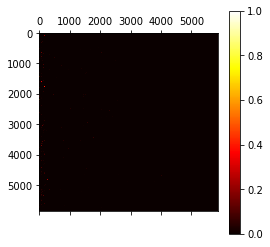

In [50]:
plt.matshow(mat_all, cmap='hot')
plt.colorbar()


In [135]:
t_hist = []
for ti in t_list:
    for i in range(1, ti.shape[0]):
#         diff = ti[i]-ti[i-1]+1
#         t_hist.append( math.log( diff) )
        for j in range(i-1):
            diff = ti[i]-ti[j]+1
            t_hist.append( math.log( diff) )

(array([4.4896000e+04, 2.3350480e+06, 1.8868050e+07, 2.7986101e+07,
        4.8570577e+07, 2.5512396e+08, 5.1823088e+07, 3.1830000e+03,
        9.8400000e+02, 3.2680000e+03]),
 array([ 0.        ,  2.18544156,  4.37088312,  6.55632468,  8.74176625,
        10.92720781, 13.11264937, 15.29809093, 17.48353249, 19.66897405,
        21.85441562]),
 <a list of 10 Patch objects>)

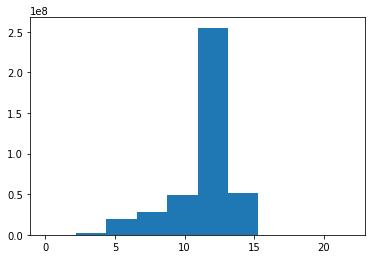

In [136]:
plt.hist(t_hist)

In [11]:
t_hist2 = []
for ti in t_list:
    for i in range(1, ti.shape[0]):
        diff = ti[i]-ti[i-1]+1
        t_hist2.append( diff )

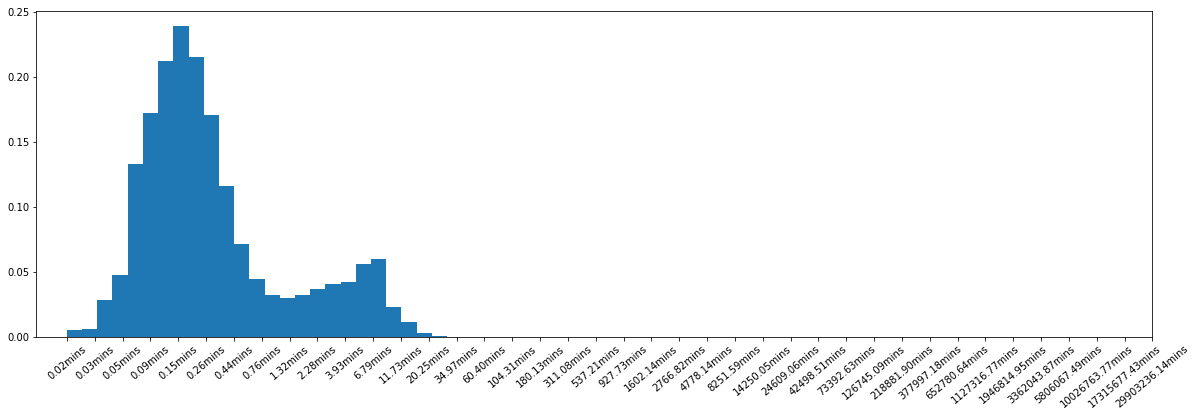

In [12]:
plt.rcParams["figure.figsize"] = (20,6)
_, bins, _ = plt.hist(np.log(t_hist2), bins=40, density=True)
plt.xticks(ticks=np.arange(40), labels= ['%.2fmins' % b for b in np.exp(bins)/60 ], rotation=40)
plt.show()

In [8]:
t_hist3 = []
for c, t in zip(c_list, t_list):
    last_pos = {}
    for i in range(1, c.shape[0]):
        if c[i] in last_pos and c[i-1] != c[i]:
            diff = t[i]-last_pos[c[i]] + 1
            t_hist3.append( (diff) )

        last_pos[c[i]] = t[i] 

In [10]:
t_list[0]

array([1511544070, 1511561733, 1511572885, 1511593493, 1511596146,
       1511644942, 1511713473, 1511725471, 1511733732, 1511741471,
       1511750828, 1511758881, 1511773214, 1511839385, 1511842184,
       1511844273, 1511855664, 1511870864, 1511871096, 1511884553,
       1511909676, 1511910242, 1511911930, 1511939239, 1511975142,
       1511984943, 1512004568, 1512011019, 1512041260, 1512044958,
       1512049438, 1512061318, 1512084223, 1512149435, 1512149929,
       1512172732, 1512187543, 1512190033, 1512194830, 1512224248,
       1512244023, 1512251522, 1512252443, 1512264993, 1512268502,
       1512272591])

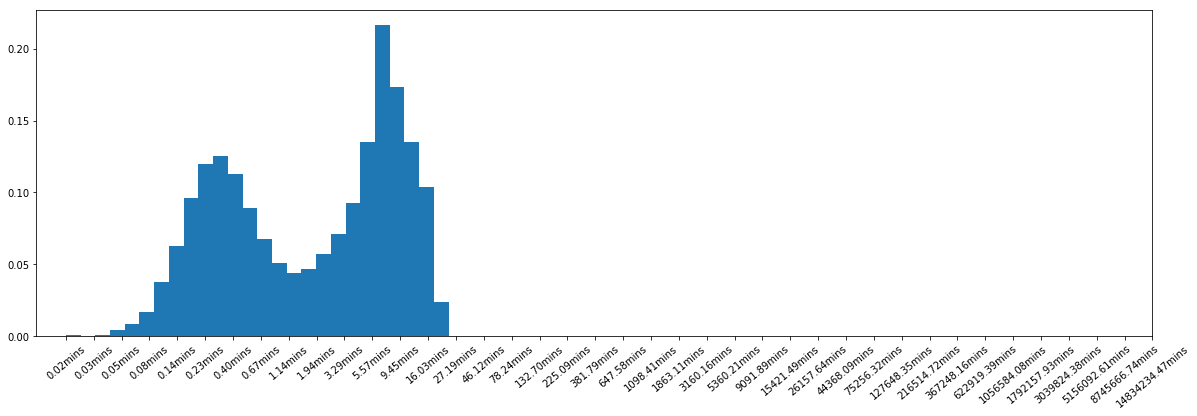

In [9]:
plt.rcParams["figure.figsize"] = (20,6)
_, bins, _ = plt.hist(np.log(t_hist3), bins=40, density=True)
plt.xticks(ticks=np.arange(40), labels= ['%.2fmins' % b for b in np.exp(bins)/60 ], rotation=40)
plt.show()

In [85]:
t_hist = []
target = 13 #7
for c, t in zip(c_list, t_list):
    last_pos = -1
    for i in range(2, c.shape[0]):
        if c[i] == target and c[i-1] != c[i] and c[i-2] != c[i]:
            if last_pos == -1:
                last_pos = t[i]
            else:
                diff = t[i]-last_pos + 1
#                 t_hist.append( (diff) )
                t_hist.append( (diff) )
        

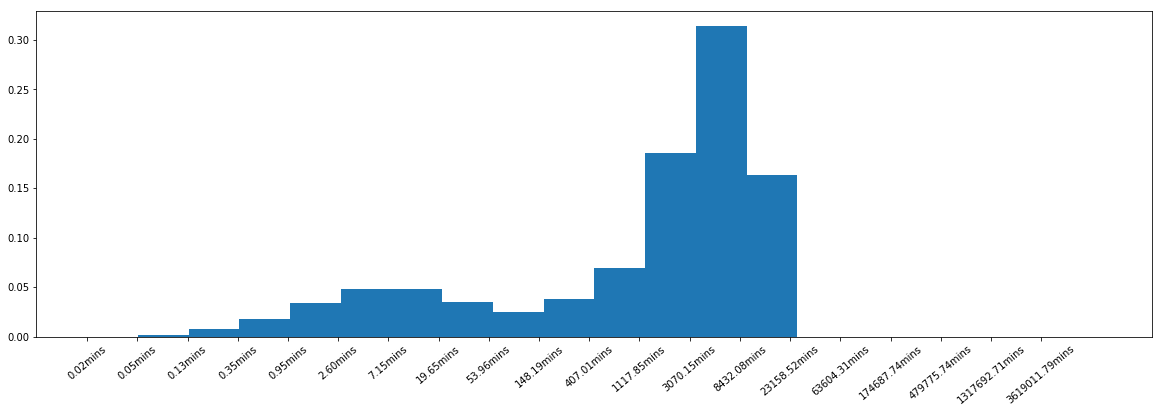

In [84]:
plt.rcParams["figure.figsize"] = (20,6)
_, bins, _ = plt.hist(np.log(t_hist), bins=20, density=True)
plt.xticks(ticks=np.arange(20), labels= ['%.2fmins' % b for b in np.exp(bins)/60 ], rotation=40)
plt.show()

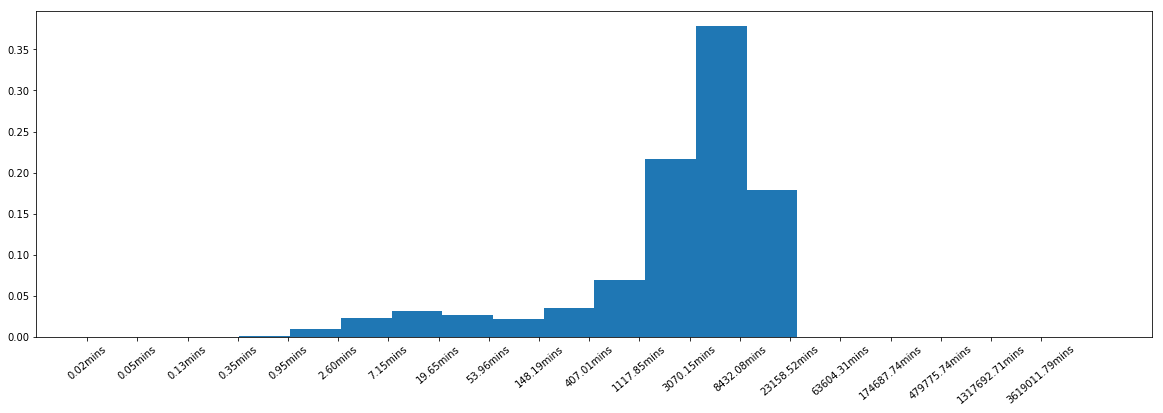

In [87]:
plt.rcParams["figure.figsize"] = (20,6)
_, bins, _ = plt.hist(np.log(t_hist), bins=20, density=True)
plt.xticks(ticks=np.arange(20), labels= ['%.2fmins' % b for b in np.exp(bins)/60 ], rotation=40)
plt.show()

In [19]:
# general preiod length
period_hist = []
for c, t in zip(c_list, t_list):
    last_pos = {}
    for i in range(1, c.shape[0]):
        if c[i] not in last_pos:
            last_pos[c[i]] = 0
        if c[i-1] != c[i]:
            last_pos[c[i]] += 1
        
    for k, v in last_pos.items():
        if v > 1:
            period_hist.append( (v) )

(array([5.53981e+05, 9.99490e+04, 6.16330e+04, 4.06340e+04, 2.78430e+04,
        3.39340e+04, 1.03470e+04, 7.89300e+03, 6.06700e+03, 4.53600e+03,
        6.30100e+03, 2.17800e+03, 1.71700e+03, 1.31000e+03, 1.02500e+03,
        1.45500e+03, 5.08000e+02, 4.12000e+02, 3.12000e+02, 2.27000e+02,
        3.37000e+02, 1.00000e+02, 9.00000e+01, 7.00000e+01, 6.30000e+01,
        9.20000e+01, 2.40000e+01, 2.10000e+01, 1.00000e+01, 1.20000e+01,
        1.30000e+01, 5.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 2. ,  3.2,  4.4,  5.6,  6.8,  8. ,  9.2, 10.4, 11.6, 12.8, 14. ,
        15.2, 16.4, 17.6, 18.8, 20. , 21.2, 22.4, 23.6, 24.8, 26. , 27.2,
        28.4, 29.6, 30.8, 32. , 33.2, 34.4, 35.6, 36.8, 38. , 39.2, 40.4,
        41.6, 42.8, 44. , 45.2, 46.4, 47.6, 48.8, 50. ]),
 <a list of 40 Patch objects>)

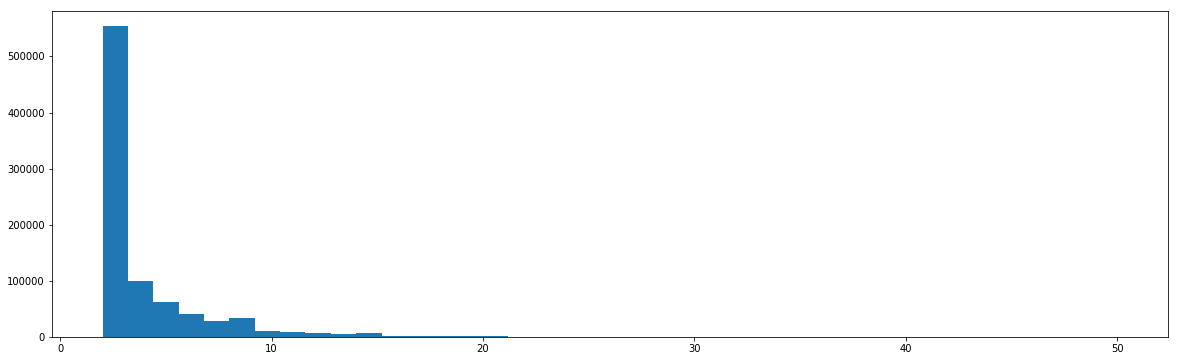

In [20]:
plt.hist(period_hist, bins=40)

In [97]:
# category specific period length
period_map = {}
for c, t in zip(c_list, t_list):
    last_pos = {}
    for i in range(1, c.shape[0]):
        if c[i] not in last_pos:
            last_pos[c[i]] = 1
        if c[i-1] != c[i]:
            last_pos[c[i]] += 1
        
    for k, v in last_pos.items():
#         if v > 1:
        if k not in period_map: period_map[k] = []
        period_map[k].append( v )
            


In [104]:
# print(period_map)
period_hist = []
period_std = []
for k,v in period_map.items():
#     if len(v) == 1: continue
    period_hist.append( np.mean(v) )
    period_std.append( np.std(v) )

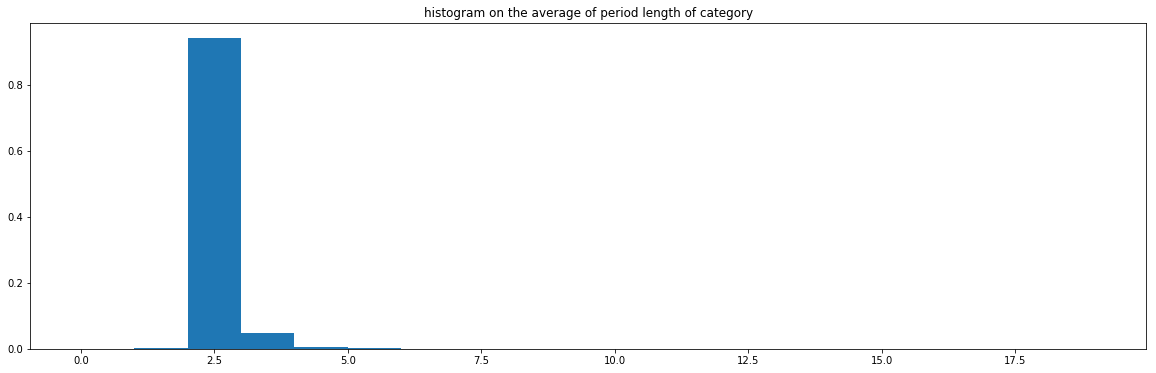

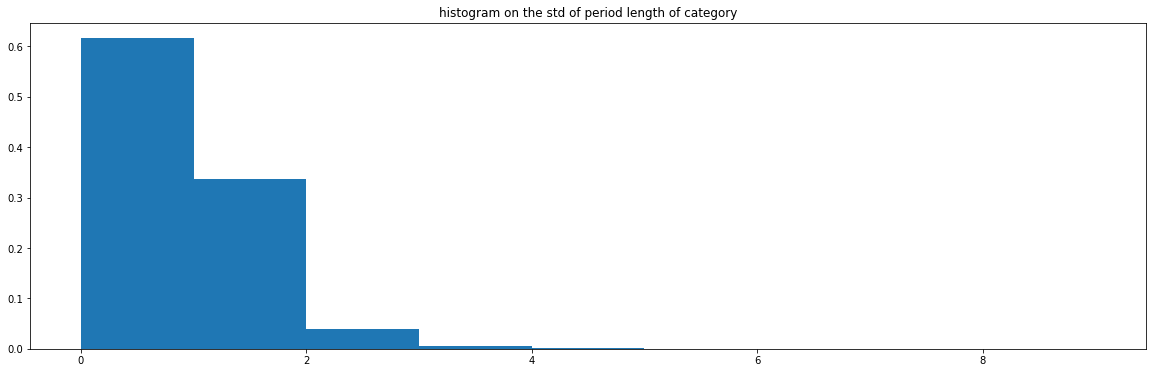

In [112]:
plt.hist(period_hist, bins=np.arange(0, 20, 1), density=True)
plt.title('histogram on the average of period length of category')
plt.show()
plt.hist(period_std, bins=np.arange(0, 10, 1), density=True)
plt.title('histogram on the std of period length of category')
plt.show()

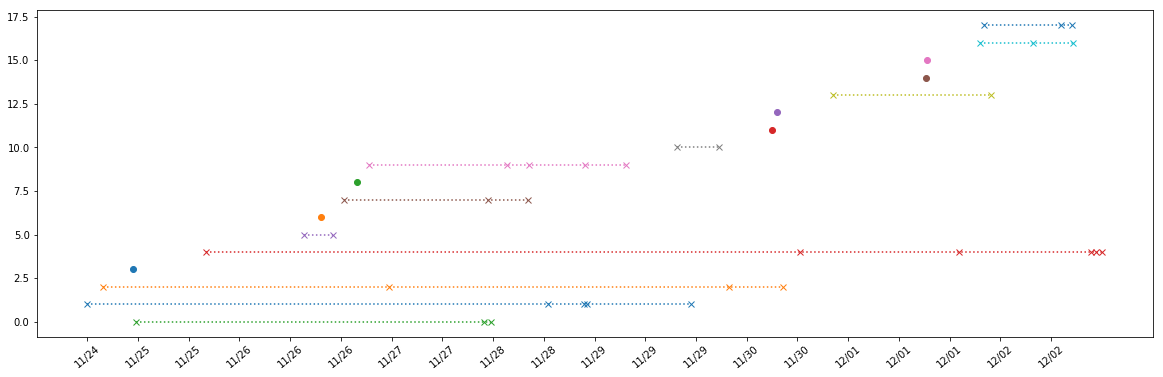

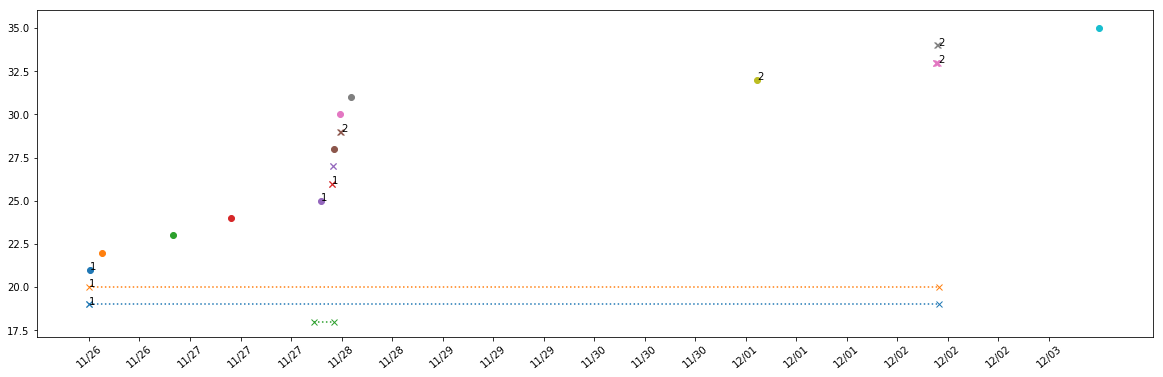

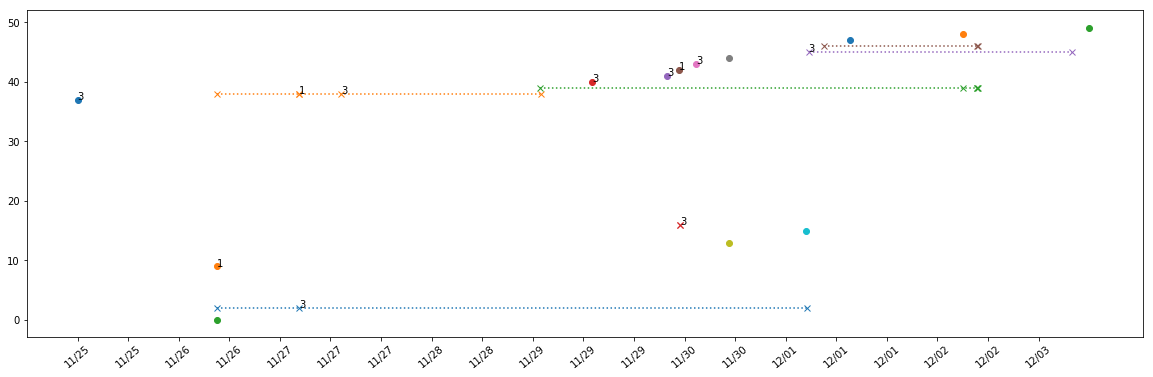

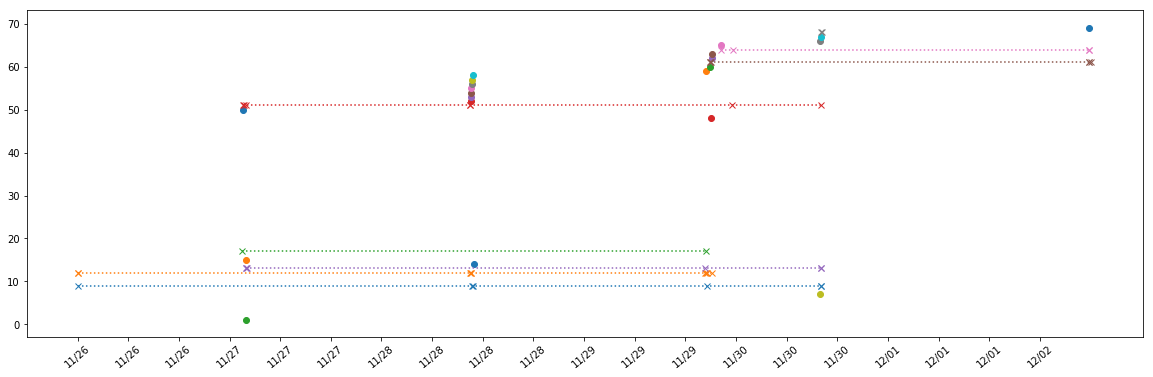

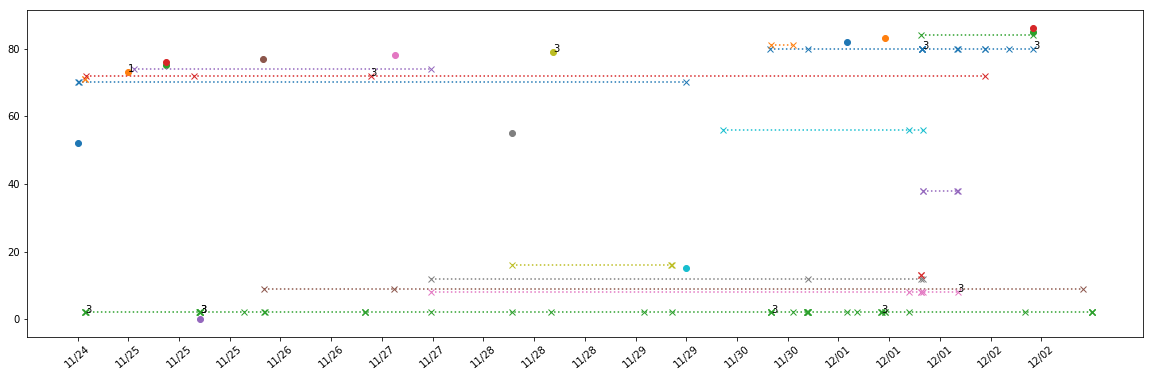

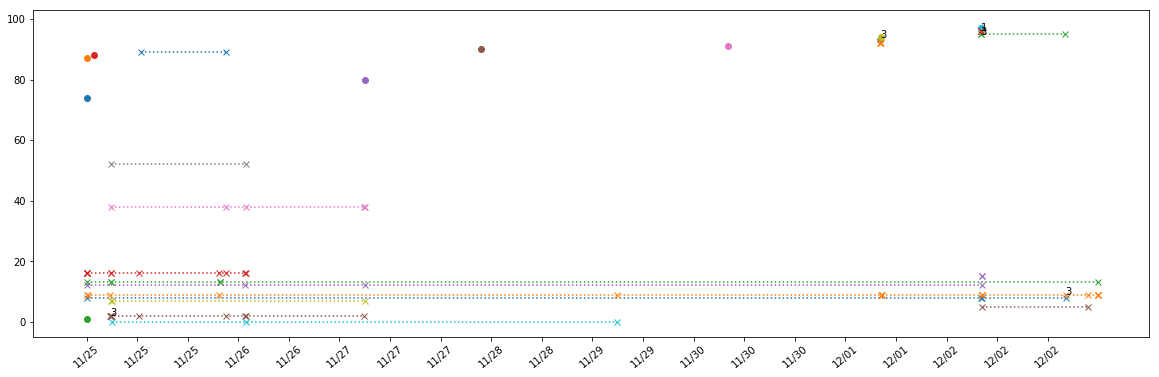

In [54]:
# target = 13 #7
cnt = 0
for c, t, a in zip(c_list, t_list, a_list):
    last_pos = {}
    max_len = 0
    for i in range(1, c.shape[0]):
        if c[i] not in last_pos:
            last_pos[c[i]] = []       
        if c[i-1] != c[i] or True:
#         if t[i] - t[i-1] > 1000 :
            last_pos[c[i]].append( (t[i], a[i]) )
            max_len = max(max_len, len(last_pos[c[i]]))
            
            
    if True or c.shape[0] > 30 or max_len > 5:
        for k, v in last_pos.items():
            y =  [k for i in range(len(v))]
            x = [i for i, _ in v]
            if len(v) == 1: 
                plt.scatter(x, y )
            else:
                plt.plot(x, y, 'x:' )
            for x, txt in v:
                if txt != 0:
                    plt.annotate( str(txt), (x, k))
        st = t[1]
        et = t[-1]
        timerange = np.arange(st, et, (et-st) / 20 )
        plt.xticks(ticks=timerange, \
                   labels= [datetime.utcfromtimestamp(b).strftime('%m/%d') for b in timerange ], rotation=40)
        plt.show()
        cnt += 1
    if cnt > 5: break


In [ ]:
t_switch = []
t_non_switch = []
# c_switch = 0
# s_switch = 0
# cs_switch = 0
# total = 0
# for y_list, t_list in zip(y_list_test, t_list_test):
for y_list, t_list in zip(c_list, t_list):
     for idx in range(1, len(y_list)):
        item_id = y_list[idx]
        last_item_id = y_list[idx-1]
#         if item_id not in discipline_map or last_item_id not in discipline_map: 
#             error += 1
#             continue
        
        #discipline_map, careerlevel_map, industry_map
        
#         last_col = employment_map[last_item_id]
#         col = employment_map[item_id]
#         delta_t = t_list[idx] - t_list[idx-1]
#         if col != last_col:
#             c_switch += 1
#         if delta_t > 30*60:
#             s_switch += 1
#         if col != last_col and delta_t > 30*60:
#             cs_switch += 1
#         total += 1

In [ ]:
# %%time

t_list_train = []
y_list_train = []
u_list_train = []
t_list_test = []
y_list_test = []
u_list_test = []

cnt = 0
# for index, row in df.iterrows():
# for row in df.itertuples():
user = 1
minti = 1511544070
# for u,t,y in zip(df['userid'], df['timestamp'], df['itemid']):
#     if cnt == 1000: break
#     cnt += 1
#     user_t = []
#     user_y = []
#     length = 0
# #     print(u,t,y)
#     if user != u:
#         e = int(length*0.9)
# #         print(e)
        
#         t_list = np.asarray([(ti - minti + 1) for ti in user_t])
#         t_list_train.append(t_list[:e])
#         t_list_test.append(t_list[e:])

#         y_list = np.asarray(user_y)
#         y_list_train.append(y_list[:e])
#         y_list_test.append(y_list[e:])

#         u_list_train.append(user)
#         u_list_test.append(user)        
#         user = u
#         minti = t
#         user_t = [t]
#         user_y = [y]
#         length = 1
#     else:
#         user_t.append(t)
#         user_y.append(y)
#         length += 1
        

for user in df.userid.unique():
#     if cnt == 10: break
#     cnt += 1
    user_seq = df.loc[df.userid==user]
    user_t = user_seq['timestamp'].values
    user_y = user_seq['itemid'].values

    e = int(user_t.shape[0] * 0.9)
    minti = min(user_t)
    t_list = np.asarray([(ti - minti + 1) for ti in user_t])
    t_list_train.append(t_list[:e])
    t_list_test.append(t_list[e:])

    y_list = np.asarray(user_y)
    y_list_train.append(y_list[:e])
    y_list_test.append(y_list[e:])
    
    u_list_train.append(user)
    u_list_test.append(user)
#     break
    


In [ ]:
pickle.dump((t_list_train, y_list_train, u_list_train), open(TRAIN_FILE, 'wb') )
pickle.dump((t_list_test, y_list_test, u_list_test), open(TEST_FILE, 'wb') )
# pickle.dump((item_map, total_items, u2idx), open(MISC_FILE, 'wb') )

In [ ]:
print(y_list_train)
print(y_list_test)
print(t_list_train)
print(t_list_test)